In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("climate-fever.csv")

In [3]:
df.head()

,claim_id,claim,claim_label,evidences/0/evidence_id,evidences/0/evidence_label,evidences/0/article,evidences/0/evidence,evidences/0/entropy,evidences/0/votes/0,evidences/0/votes/1,...,evidences/4/evidence_id,evidences/4/evidence_label,evidences/4/article,evidences/4/evidence,evidences/4/entropy,evidences/4/votes/0,evidences/4/votes/1,evidences/4/votes/2,evidences/4/votes/3,evidences/4/votes/4
0,0,Global warming is driving polar bears toward e...,SUPPORTS,Extinction risk from global warming:170,NOT_ENOUGH_INFO,Extinction risk from global warming,"""Recent Research Shows Human Activity Driving ...",0.693147,SUPPORTS,NOT_ENOUGH_INFO,...,Polar bear:1328,NOT_ENOUGH_INFO,Polar bear,"""Bear hunting caught in global warming debate"".",0.693147,SUPPORTS,NOT_ENOUGH_INFO,NaN,NaN,NaN
1,5,The sun has gone into ‘lockdown’ which could c...,SUPPORTS,Famine:386,SUPPORTS,Famine,The current consensus of the scientific commun...,0.000000,SUPPORTS,SUPPORTS,...,Winter:5,NOT_ENOUGH_INFO,Winter,"In many regions, winter is associated with sno...",0.693147,REFUTES,NOT_ENOUGH_INFO,NaN,NaN,NaN
2,6,The polar bear population has been growing.,REFUTES,Polar bear:1332,NOT_ENOUGH_INFO,Polar bear,"""Ask the experts: Are polar bear populations i...",0.693147,NOT_ENOUGH_INFO,REFUTES,...,Polar bear:61,REFUTES,Polar bear,Of the 19 recognized polar bear subpopulations...,0.000000,REFUTES,REFUTES,NaN,NaN,NaN
3,9,Ironic' study finds more CO2 has slightly cool...,REFUTES,Atmosphere of Mars:131,NOT_ENOUGH_INFO,Atmosphere of Mars,CO2 in the mesosphere acts as a cooling agent ...,0.693147,NOT_ENOUGH_INFO,SUPPORTS,...,Carbon dioxide:191,NOT_ENOUGH_INFO,Carbon dioxide,"Less energy reaches the upper atmosphere, whic...",0.000000,NOT_ENOUGH_INFO,NOT_ENOUGH_INFO,NaN,NaN,NaN
4,10,Human additions of CO2 are in the margin of er...,REFUTES,Carbon dioxide in Earth's atmosphere:140,NOT_ENOUGH_INFO,Carbon dioxide in Earth's atmosphere,While CO 2 absorption and release is always ha...,0.693147,NOT_ENOUGH_INFO,REFUTES,...,Sea:226,REFUTES,Sea,"More recently, anthropogenic activities have s...",0.000000,REFUTES,REFUTES,NaN,NaN,NaN


In [4]:
# Select only the required columns
df_filtered = df[['claim', 'claim_label']]

# Define the mapping of labels
label_mapping = {
    'SUPPORTS': 'True',
    'REFUTES': 'False',
    'NOT_ENOUGH_INFO': 'Insufficient Evidence',
    'DISPUTED': 'Partially True'
}

# Apply the mapping to the claim_label column
df_filtered['claim_label'] = df_filtered['claim_label'].map(label_mapping)



/var/folders/tq/_g562qkj467fkdvt5my8dy180000gn/T/ipykernel_73926/3287360528.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['claim_label'] = df_filtered['claim_label'].map(label_mapping)


In [5]:
df_filtered.head()

,claim,claim_label
0,Global warming is driving polar bears toward e...,True
1,The sun has gone into ‘lockdown’ which could c...,True
2,The polar bear population has been growing.,False
3,Ironic' study finds more CO2 has slightly cool...,False
4,Human additions of CO2 are in the margin of er...,False


In [6]:
%pip install pandas requests scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import requests
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
)

In [8]:
API_URL = "http://127.0.0.1:5001/fact-check"

SLEEP_SEC    = 0.1  

claims = df_filtered["claim"].tolist()
gold_labels = df_filtered["claim_label"].tolist()


# 3.—— Define label mapping ——————————————————————————————————————
# We map each verdict string to an integer 0–3
label_values = ["True", "False", "Partially True", "Insufficient Evidence"]
label2idx = {lab: i for i, lab in enumerate(label_values)}

y_true = [label2idx[label] for label in gold_labels]

In [9]:
# 4.—— Call the Flask API for each claim —————————————————————————————
y_pred = []
for claim in claims:
    resp = requests.post(API_URL, json={"claim": claim})
    data = resp.json()
    pred_verdict = data.get("verdict", "")
    # fallback if unknown
    if pred_verdict not in label2idx:
        pred_idx = -1
    else:
        pred_idx = label2idx[pred_verdict]
    y_pred.append(pred_idx)
    time.sleep(SLEEP_SEC)

KeyboardInterrupt: 

In [16]:
y_true = y_true[:476]

In [29]:
# Assume y_true and y_pred are lists of the same length
with open("output.txt", "w") as file:
    file.write("y_true\ty_pred\n")  # Optional: header
    for true_val, pred_val in zip(y_true, y_pred):
        file.write(f"{true_val}\t{pred_val}\n")


In [36]:
y_true = []
y_pred = []

with open("output.txt", "r") as f:
    next(f)  # Skip header
    for line in f:
        parts = line.strip().split()
        if len(parts) == 2:
            y_true.append(int(parts[0]))
            y_pred.append(int(parts[1]))

print("y_true =", y_true)
print("y_pred =", y_pred)


y_true = [0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 3, 0, 3, 0, 1, 1, 3, 1, 0, 1, 1, 0, 2, 0, 2, 3, 2, 3, 1, 0, 3, 0, 0, 3, 3, 1, 1, 2, 1, 3, 3, 3, 0, 1, 1, 3, 0, 0, 3, 3, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 3, 3, 3, 0, 0, 1, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 1, 0, 2, 0, 0, 3, 0, 3, 0, 1, 3, 1, 3, 1, 3, 3, 3, 0, 0, 3, 3, 1, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 3, 3, 1, 0, 0, 1, 3, 2, 2, 3, 0, 3, 0, 2, 3, 3, 0, 0, 3, 1, 1, 1, 1, 3, 1, 0, 3, 3, 0, 3, 0, 3, 2, 0, 0, 3, 2, 1, 0, 2, 1, 1, 1, 3, 1, 1, 0, 0, 1, 0, 1, 3, 3, 2, 0, 0, 3, 3, 2, 2, 3, 3, 3, 0, 3, 1, 1, 0, 3, 0, 3, 1, 3, 1, 1, 1, 3, 3, 3, 3, 2, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 2, 3, 3, 3, 3, 3, 1, 3, 3, 0, 3, 3, 1, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 2, 3, 1, 3, 0, 0, 0, 0, 0, 0, 3, 2, 2, 1, 0, 3, 0, 1, 3, 0, 0, 2, 0, 3, 3, 0, 3, 0, 2, 2, 2, 3, 1, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 1, 0, 3, 0, 0, 0, 3, 3, 2, 3, 0, 0, 2, 0, 3, 0, 3, 3, 

In [37]:
# 5.—— Filter out any failures (-1) if needed ——————————————————————————
valid_idxs = [i for i, p in enumerate(y_pred) if p >= 0]
y_true = [y_true[i] for i in valid_idxs]
y_pred = [y_pred[i] for i in valid_idxs]

In [38]:
# 6.—— Compute Metrics —————————————————————————————————————————
acc = accuracy_score(y_true, y_pred)
print(f"\nOverall Accuracy: {acc:.3f}\n")

print("Classification Report:")
print(classification_report(
    y_true,
    y_pred,
    labels=list(range(len(label_values))),
    target_names=label_values,
    zero_division=0
))

cm = confusion_matrix(y_true, y_pred, labels=list(range(len(label_values))))
print("Confusion Matrix:\n", cm)


Overall Accuracy: 0.952

Classification Report:
                       precision    recall  f1-score   support

                 True       0.99      0.94      0.97       203
                False       0.92      0.91      0.92        79
       Partially True       0.79      0.97      0.87        38
Insufficient Evidence       0.96      0.98      0.97       159

             accuracy                           0.95       479
            macro avg       0.92      0.95      0.93       479
         weighted avg       0.96      0.95      0.95       479

Confusion Matrix:
 [[191   3   7   2]
 [  1  72   3   3]
 [  0   0  37   1]
 [  0   3   0 156]]


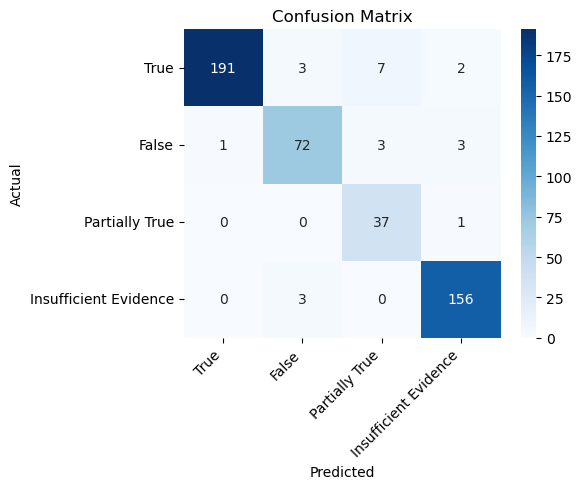

In [39]:
# 7.—— Visualize Confusion Matrix ————————————————————————————————
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_values,
            yticklabels=label_values)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

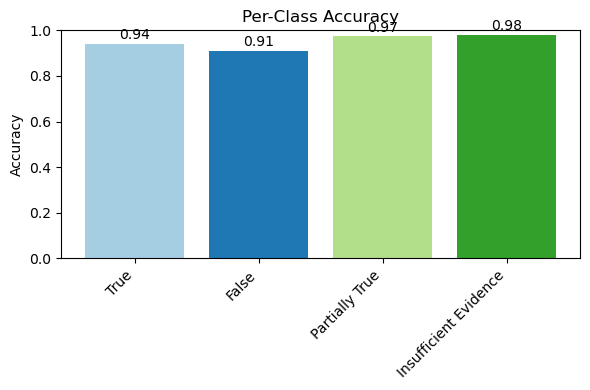

In [40]:
# 8.—— Per-Class Accuracy Bar Chart ——————————————————————————————
per_class_acc = cm.diagonal() / cm.sum(axis=1)
plt.figure(figsize=(6,4))
bars = plt.bar(label_values, per_class_acc, color=plt.cm.Paired.colors)
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Per-Class Accuracy")
plt.xticks(rotation=45, ha="right")
for bar, acc_val in zip(bars, per_class_acc):
    plt.text(bar.get_x() + bar.get_width()/2, acc_val+0.02,
             f"{acc_val:.2f}", ha="center")
plt.tight_layout()
plt.show()